# Visualización 3D de Modelos 3D - Vértices, Aristas y Caras

## Objetivo
Cargar, analizar y visualizar modelos 3D (OBJ, STL, GLTF) mostrando su estructura de vértices, aristas y caras con información detallada de la malla.

## 1. Instalación Automática de Dependencias

In [1]:
import subprocess
import sys

# Instalar dependencias automáticamente
libraries = ['trimesh', 'vedo', 'numpy', 'matplotlib', 'imageio', 'imageio-ffmpeg', 'pillow']

for lib in libraries:
    try:
        __import__(lib.replace('-', '_'))
        print(f"✓ {lib} ya está instalado")
    except ImportError:
        print(f"Installing {lib}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", lib, "-q"])
        print(f"✓ {lib} instalado correctamente")

print("\n✅ Todas las dependencias están listas!")

✓ trimesh ya está instalado
✓ vedo ya está instalado
✓ numpy ya está instalado
✓ matplotlib ya está instalado
✓ imageio ya está instalado
✓ imageio-ffmpeg ya está instalado
Installing pillow...
✓ pillow instalado correctamente

✅ Todas las dependencias están listas!



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: pip install --upgrade pip


## 2. Importar Librerías Necesarias

In [2]:
import trimesh
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import os
from pathlib import Path
import imageio
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

print("✓ Librerías importadas correctamente")

✓ Librerías importadas correctamente


## 3. Cargar Modelo 3D

In [3]:
# Definir rutas de archivos
current_dir = Path.cwd()
model_path = current_dir / 'scene.obj'

# Buscar el archivo en la carpeta actual y en subdirectorios
if not model_path.exists():
    # Buscar en el directorio del notebook
    notebook_dir = Path(os.path.dirname(os.path.isabs(__file__) or os.path.abspath('.')))
    model_path = notebook_dir / 'scene.obj'
    
    if not model_path.exists():
        # Listar archivos disponibles para debug
        print("Archivos OBJ disponibles:")
        for root, dirs, files in os.walk('.'):
            for file in files:
                if file.endswith(('.obj', '.stl', '.gltf', '.glb')):
                    print(f"  - {os.path.join(root, file)}")

# Cargar el modelo
print(f"Cargando modelo desde: {model_path}")
mesh = trimesh.load(str(model_path))

# Si es una escena con múltiples mallas, unirlas
if isinstance(mesh, trimesh.Scene):
    mesh = trimesh.util.concatenate(mesh.geometry.values())

print(f"✓ Modelo cargado exitosamente")
print(f"  Tipo: {type(mesh)}")
print(f"  Es watertight: {mesh.is_watertight}")

Cargando modelo desde: /home/gabotachak/github.com/gabotachak/visualcomputing2026-i/semana_01_1_construyendo_mundo_3d/python/scene.obj
✓ Modelo cargado exitosamente
  Tipo: <class 'trimesh.base.Trimesh'>
  Es watertight: False


## 4. Información Estructural del Modelo
### Análisis detallado de vértices, aristas y caras

In [4]:
# Extraer información estructural
vertices = mesh.vertices
faces = mesh.faces
num_vertices = len(vertices)
num_faces = len(faces)

# Calcular número de aristas
# Una arista se define como una conexión entre dos vértices
edges = set()
for face in faces:
    for i in range(len(face)):
        v1, v2 = face[i], face[(i + 1) % len(face)]
        edge = tuple(sorted([v1, v2]))
        edges.add(edge)
num_edges = len(edges)

# Información adicional
bounding_box = mesh.bounds
volume = mesh.volume if mesh.is_watertight else 0
surface_area = mesh.area

print("="*60)
print("📊 INFORMACIÓN ESTRUCTURAL DEL MODELO 3D")
print("="*60)
print(f"\n📍 VÉRTICES:")
print(f"  • Cantidad total: {num_vertices:,}")
print(f"  • Rango X: {vertices[:, 0].min():.3f} a {vertices[:, 0].max():.3f}")
print(f"  • Rango Y: {vertices[:, 1].min():.3f} a {vertices[:, 1].max():.3f}")
print(f"  • Rango Z: {vertices[:, 2].min():.3f} a {vertices[:, 2].max():.3f}")

print(f"\n🔗 ARISTAS:")
print(f"  • Cantidad total: {num_edges:,}")

print(f"\n□ CARAS (TRIÁNGULOS):")
print(f"  • Cantidad total: {num_faces:,}")

print(f"\n📐 PROPIEDADES GEOMÉTRICAS:")
print(f"  • Bounding Box: {bounding_box}")
print(f"  • Volumen: {volume:.6f} unidades³")
print(f"  • Área Superficial: {surface_area:.6f} unidades²")
print(f"  • Centro de Masa: {mesh.center_mass}")
print(f"  • Es válido (watertight): {mesh.is_watertight}")

print("\n" + "="*60)

📊 INFORMACIÓN ESTRUCTURAL DEL MODELO 3D

📍 VÉRTICES:
  • Cantidad total: 25,979
  • Rango X: -0.586 a 0.456
  • Rango Y: -1.013 a 0.744
  • Rango Z: -0.502 a 0.447

🔗 ARISTAS:
  • Cantidad total: 71,871

□ CARAS (TRIÁNGULOS):
  • Cantidad total: 45,386

📐 PROPIEDADES GEOMÉTRICAS:
  • Bounding Box: [[-0.58599412 -1.01277089 -0.50177825]
 [ 0.45609859  0.74431109  0.44688198]]
  • Volumen: 0.000000 unidades³
  • Área Superficial: 2.435474 unidades²
  • Centro de Masa: [ 0.0285938  -0.16837477 -0.03857575]
  • Es válido (watertight): False



## 5. Visualización Completa del Modelo 3D

✓ Visualización guardada en ../media/modelo_completo.png


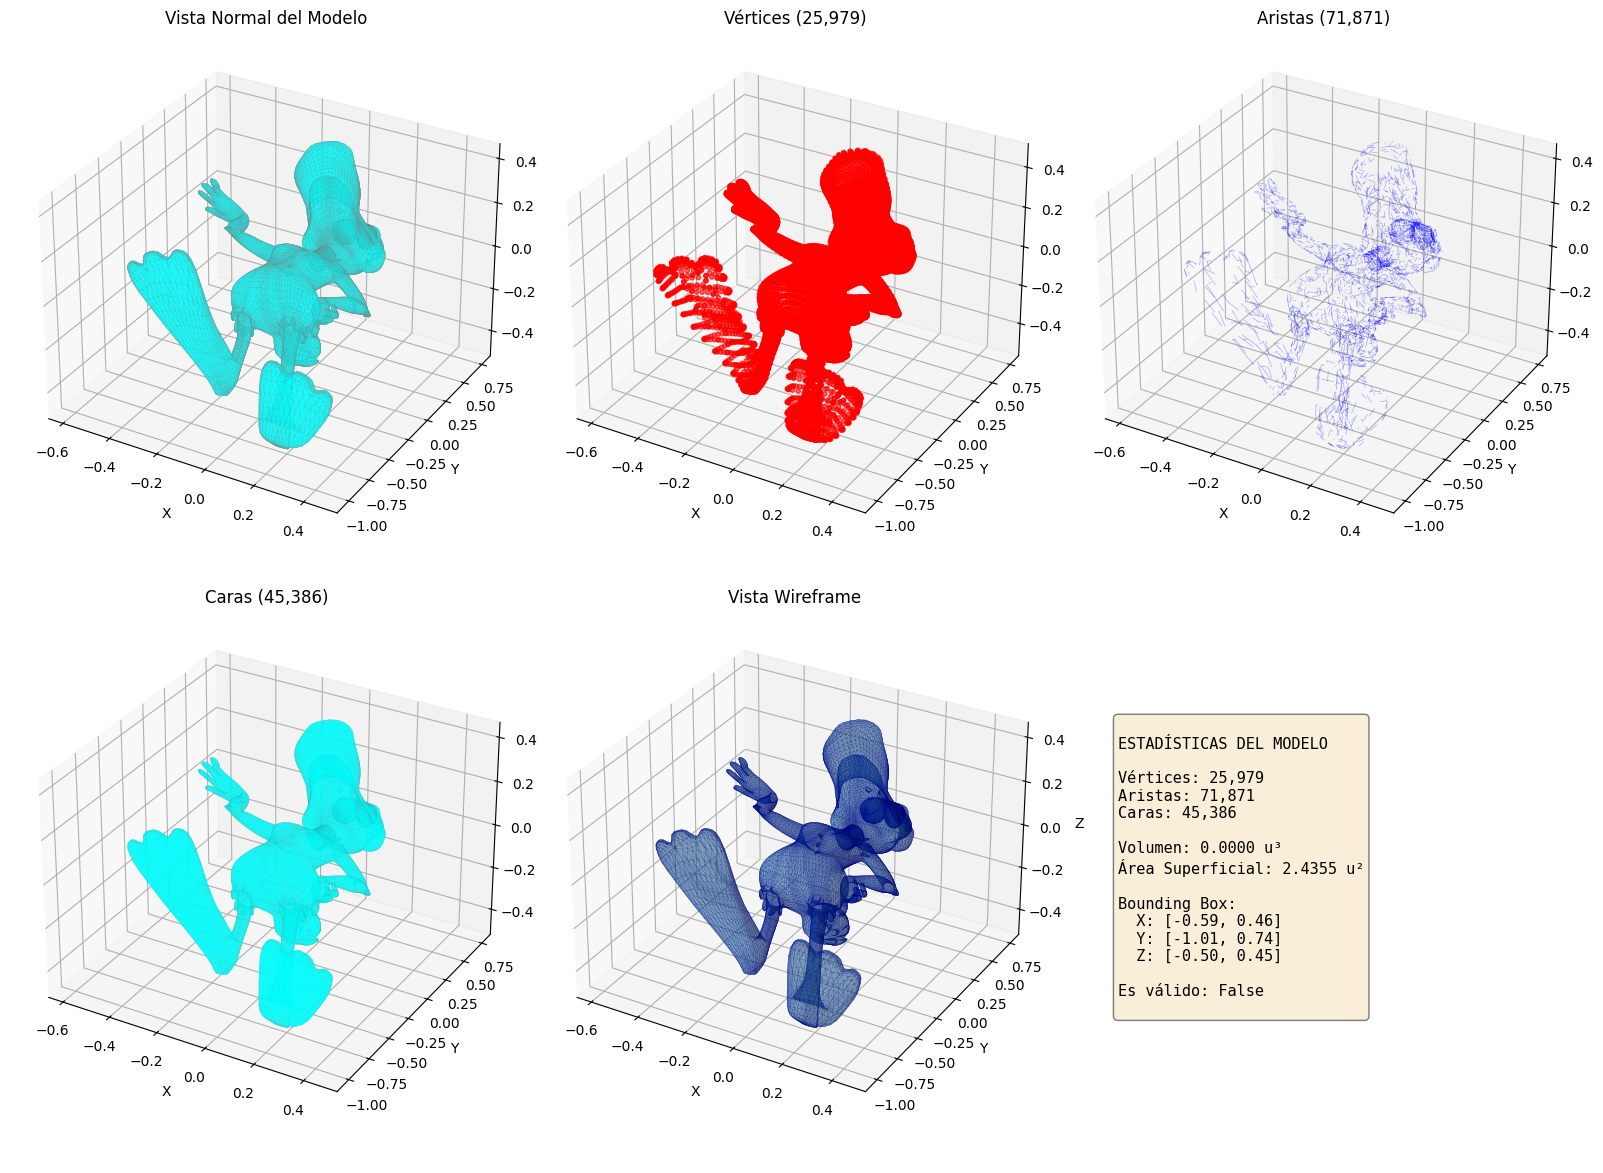

In [5]:
fig = plt.figure(figsize=(16, 12))

# 1. Vista normal del modelo
ax1 = fig.add_subplot(2, 3, 1, projection='3d')
poly3d = [[vertices[face] for face in faces]]
ax1.add_collection3d(Poly3DCollection(poly3d[0], alpha=0.7, facecolor='cyan', edgecolor='gray', linewidth=0.1))
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.set_title('Vista Normal del Modelo')
ax1.auto_scale_xyz(vertices[:, 0], vertices[:, 1], vertices[:, 2])

# 2. Visualización de Vértices
ax2 = fig.add_subplot(2, 3, 2, projection='3d')
ax2.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2], c='red', marker='o', s=10, alpha=0.6)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.set_title(f'Vértices ({num_vertices:,})')
ax2.auto_scale_xyz(vertices[:, 0], vertices[:, 1], vertices[:, 2])

# 3. Visualización de Aristas
ax3 = fig.add_subplot(2, 3, 3, projection='3d')
for edge in list(edges)[:5000]:  # Limitar para claridad visual
    v1, v2 = edge
    ax3.plot(vertices[[v1, v2], 0], vertices[[v1, v2], 1], vertices[[v1, v2], 2], 'b-', linewidth=0.5, alpha=0.3)
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.set_zlabel('Z')
ax3.set_title(f'Aristas ({num_edges:,})')
ax3.auto_scale_xyz(vertices[:, 0], vertices[:, 1], vertices[:, 2])

# 4. Modelo con colores por cara
ax4 = fig.add_subplot(2, 3, 4, projection='3d')
colors = np.linspace(0, 1, len(faces))
poly_colored = [[vertices[face] for face in faces]]
collection = Poly3DCollection(poly_colored[0], alpha=0.8, edgecolor='gray', linewidth=0.02)
collection.set_facecolor('cyan')
ax4.add_collection3d(collection)
ax4.set_xlabel('X')
ax4.set_ylabel('Y')
ax4.set_zlabel('Z')
ax4.set_title(f'Caras ({num_faces:,})')
ax4.auto_scale_xyz(vertices[:, 0], vertices[:, 1], vertices[:, 2])

# 5. Vista en modo Wireframe
ax5 = fig.add_subplot(2, 3, 5, projection='3d')
ax5.plot_trisurf(vertices[:, 0], vertices[:, 1], vertices[:, 2], triangles=faces, 
                 linewidth=0.2, antialiased=True, alpha=0.3, edgecolor='darkblue')
ax5.set_xlabel('X')
ax5.set_ylabel('Y')
ax5.set_zlabel('Z')
ax5.set_title('Vista Wireframe')
ax5.auto_scale_xyz(vertices[:, 0], vertices[:, 1], vertices[:, 2])

# 6. Estadísticas textuales
ax6 = fig.add_subplot(2, 3, 6)
ax6.axis('off')
stats_text = f"""
ESTADÍSTICAS DEL MODELO

Vértices: {num_vertices:,}
Aristas: {num_edges:,}
Caras: {num_faces:,}

Volumen: {volume:.4f} u³
Área Superficial: {surface_area:.4f} u²

Bounding Box:
  X: [{vertices[:, 0].min():.2f}, {vertices[:, 0].max():.2f}]
  Y: [{vertices[:, 1].min():.2f}, {vertices[:, 1].max():.2f}]
  Z: [{vertices[:, 2].min():.2f}, {vertices[:, 2].max():.2f}]

Es válido: {mesh.is_watertight}
"""
ax6.text(0.1, 0.5, stats_text, fontsize=11, verticalalignment='center',
         fontfamily='monospace', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.savefig('../media/modelo_completo.png', dpi=150, bbox_inches='tight')
print("✓ Visualización guardada en ../media/modelo_completo.png")
plt.show()

## 6. Visualizaciones Detalladas: Vértices, Aristas y Caras

✓ Visualización de componentes guardada en ../media/vertices_edges_faces.png


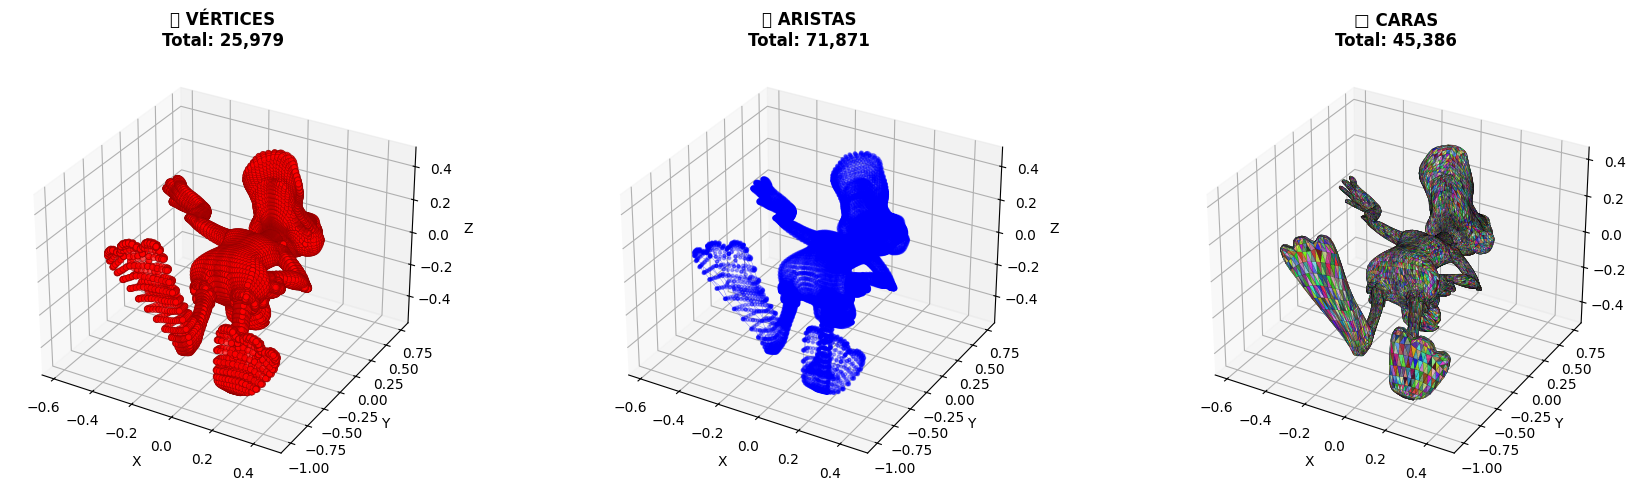

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5), subplot_kw={'projection': '3d'})

# 1. VÉRTICES - Puntos rojos
ax = axes[0]
ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2], 
          c='red', s=20, alpha=0.7, edgecolors='darkred', linewidth=0.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title(f'🔴 VÉRTICES\nTotal: {num_vertices:,}', fontsize=12, fontweight='bold')
ax.auto_scale_xyz(vertices[:, 0], vertices[:, 1], vertices[:, 2])
ax.grid(True, alpha=0.3)

# 2. ARISTAS - Líneas azules (muestra)
ax = axes[1]
# Dibujar las aristas
edge_list = list(edges)
sample_size = min(10000, len(edge_list))
sample_edges = edge_list[:sample_size]
for edge in sample_edges:
    v1, v2 = edge
    ax.plot(vertices[[v1, v2], 0], vertices[[v1, v2], 1], vertices[[v1, v2], 2], 
           'b-', linewidth=0.3, alpha=0.5)
ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2], 
          c='blue', s=5, alpha=0.3)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title(f'🔗 ARISTAS\nTotal: {num_edges:,}', fontsize=12, fontweight='bold')
ax.auto_scale_xyz(vertices[:, 0], vertices[:, 1], vertices[:, 2])
ax.grid(True, alpha=0.3)

# 3. CARAS - Triángulos en color
ax = axes[2]
face_colors = np.random.rand(len(faces), 3)
poly_collection = Poly3DCollection([vertices[face] for face in faces], 
                                   alpha=0.8, edgecolor='black', linewidth=0.1)
poly_collection.set_facecolor(face_colors)
ax.add_collection3d(poly_collection)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title(f'□ CARAS\nTotal: {num_faces:,}', fontsize=12, fontweight='bold')
ax.auto_scale_xyz(vertices[:, 0], vertices[:, 1], vertices[:, 2])
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../media/vertices_edges_faces.png', dpi=150, bbox_inches='tight')
print("✓ Visualización de componentes guardada en ../media/vertices_edges_faces.png")
plt.show()

## 7. Animación Rotatoria - Exportar como GIF

In [7]:
# Crear animación rotatoria
print("🎬 Generando animación rotatoria (esto puede tomar un minuto)...")

frames = []
num_frames = 36  # 36 frames = 10° por frame = 360° en total
angles = np.linspace(0, 360, num_frames, endpoint=False)

for i, angle in enumerate(angles):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Dibujar el modelo
    poly_collection = Poly3DCollection([vertices[face] for face in faces],
                                      alpha=0.8, edgecolor='gray', linewidth=0.1)
    poly_collection.set_facecolor('cyan')
    ax.add_collection3d(poly_collection)
    
    # Configurar vista
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'Rotación: {angle:.1f}°', fontsize=12, fontweight='bold')
    ax.view_init(elev=20, azim=angle)
    ax.auto_scale_xyz(vertices[:, 0], vertices[:, 1], vertices[:, 2])
    
    # Convertir figura a imagen usando método compatible
    fig.canvas.draw()
    # Usar tobytes() en lugar de tostring_rgb()
    image_data = np.frombuffer(fig.canvas.buffer_rgba(), dtype=np.uint8)
    image = image_data.reshape(fig.canvas.get_width_height()[::-1] + (4,))
    # Convertir de RGBA a RGB
    image = image[:, :, :3]
    frames.append(image)
    
    plt.close(fig)
    
    if (i + 1) % 10 == 0:
        print(f"  Frames generados: {i + 1}/{num_frames}")

# Exportar como GIF
gif_path = '../media/modelo_rotacion.gif'
print(f"\n💾 Guardando GIF en {gif_path}...")
imageio.mimsave(gif_path, frames, duration=0.1)
print(f"✓ GIF creado exitosamente: {gif_path}")
print(f"  Duración: {num_frames * 0.1:.1f} segundos")
print(f"  FPS: 10")

🎬 Generando animación rotatoria (esto puede tomar un minuto)...
  Frames generados: 10/36
  Frames generados: 20/36
  Frames generados: 30/36

💾 Guardando GIF en ../media/modelo_rotacion.gif...
✓ GIF creado exitosamente: ../media/modelo_rotacion.gif
  Duración: 3.6 segundos
  FPS: 10


## 8. Animaciones de Componentes Individuales

In [8]:
# Animación de VÉRTICES
print("🎬 Generando animación de vértices...")
frames_vertices = []
num_frames = 36

for i, angle in enumerate(np.linspace(0, 360, num_frames, endpoint=False)):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Dibujar vértices con colores degradados
    ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2],
              c=vertices[:, 0], cmap='viridis', s=30, alpha=0.8, edgecolors='darkred', linewidth=0.3)
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'Vértices - Rotación: {angle:.1f}°', fontsize=12, fontweight='bold')
    ax.view_init(elev=20, azim=angle)
    ax.auto_scale_xyz(vertices[:, 0], vertices[:, 1], vertices[:, 2])
    
    fig.canvas.draw()
    image_data = np.frombuffer(fig.canvas.buffer_rgba(), dtype=np.uint8)
    image = image_data.reshape(fig.canvas.get_width_height()[::-1] + (4,))
    image = image[:, :, :3]
    frames_vertices.append(image)
    plt.close(fig)

imageio.mimsave('../media/vertices_rotation.gif', frames_vertices, duration=0.1)
print("✓ Animación de vértices guardada: ../media/vertices_rotation.gif")

# Animación de CARAS con colores aleatorios persistentes
print("🎬 Generando animación de caras...")
frames_faces = []
face_colors = np.random.rand(len(faces), 3)

for i, angle in enumerate(np.linspace(0, 360, num_frames, endpoint=False)):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    poly_collection = Poly3DCollection([vertices[face] for face in faces],
                                      alpha=0.8, edgecolor='black', linewidth=0.1)
    poly_collection.set_facecolor(face_colors)
    ax.add_collection3d(poly_collection)
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'Caras - Rotación: {angle:.1f}°', fontsize=12, fontweight='bold')
    ax.view_init(elev=20, azim=angle)
    ax.auto_scale_xyz(vertices[:, 0], vertices[:, 1], vertices[:, 2])
    
    fig.canvas.draw()
    image_data = np.frombuffer(fig.canvas.buffer_rgba(), dtype=np.uint8)
    image = image_data.reshape(fig.canvas.get_width_height()[::-1] + (4,))
    image = image[:, :, :3]
    frames_faces.append(image)
    plt.close(fig)

imageio.mimsave('../media/faces_rotation.gif', frames_faces, duration=0.1)
print("✓ Animación de caras guardada: ../media/faces_rotation.gif")

🎬 Generando animación de vértices...
✓ Animación de vértices guardada: ../media/vertices_rotation.gif
🎬 Generando animación de caras...
✓ Animación de caras guardada: ../media/faces_rotation.gif


## 9. Resumen y Exportación de Resultados

In [9]:
print("\n" + "="*70)
print("✅ RESUMEN DE ANÁLISIS Y EXPORTACIÓN".center(70))
print("="*70)

print(f"\n📊 INFORMACIÓN DEL MODELO:")
print(f"  • Archivo: {model_path.name}")
print(f"  • Vértices: {num_vertices:,}")
print(f"  • Aristas: {num_edges:,}")
print(f"  • Caras (triángulos): {num_faces:,}")
print(f"  • Volumen: {volume:.6f} unidades³")
print(f"  • Área Superficial: {surface_area:.6f} unidades²")

print(f"\n📁 ARCHIVOS EXPORTADOS A ../media/:")
print(f"  ✓ modelo_completo.png - Visualización 6 vistas")
print(f"  ✓ vertices_edges_faces.png - Componentes por separado")
print(f"  ✓ modelo_rotacion.gif - Animación rotatoria completa")
print(f"  ✓ vertices_rotation.gif - Animación de vértices")
print(f"  ✓ faces_rotation.gif - Animación de caras")

print(f"\n📈 ESTADÍSTICAS DE ESTRUCTURA:")
print(f"  • Relación V/E: {num_vertices / num_edges:.4f}")
print(f"  • Relación E/F: {num_edges / num_faces:.4f}")
print(f"  • Relación V/F: {num_vertices / num_faces:.4f}")

# Calcular propiedades topológicas
# Teorema de Euler: V - E + F = 2 para una malla cerrada
euler_characteristic = num_vertices - num_edges + num_faces
print(f"\n🔢 TOPOLOGÍA:")
print(f"  • Característica de Euler (V - E + F): {euler_characteristic}")
print(f"    (Debería ser 2 para una malla cerrada)")

# Aristas por vértice promedio
edges_per_vertex = (2 * num_edges) / num_vertices
print(f"  • Aristas por vértice (promedio): {edges_per_vertex:.2f}")

# Vértices por cara promedio
verts_per_face = (3 * num_faces) / num_vertices if num_vertices > 0 else 0
print(f"  • Vértices por cara (promedio): {verts_per_face:.2f}")

print("\n" + "="*70)
print("✨ ¡Análisis completado exitosamente!".center(70))
print("="*70)


                 ✅ RESUMEN DE ANÁLISIS Y EXPORTACIÓN                  

📊 INFORMACIÓN DEL MODELO:
  • Archivo: scene.obj
  • Vértices: 25,979
  • Aristas: 71,871
  • Caras (triángulos): 45,386
  • Volumen: 0.000000 unidades³
  • Área Superficial: 2.435474 unidades²

📁 ARCHIVOS EXPORTADOS A ../media/:
  ✓ modelo_completo.png - Visualización 6 vistas
  ✓ vertices_edges_faces.png - Componentes por separado
  ✓ modelo_rotacion.gif - Animación rotatoria completa
  ✓ vertices_rotation.gif - Animación de vértices
  ✓ faces_rotation.gif - Animación de caras

📈 ESTADÍSTICAS DE ESTRUCTURA:
  • Relación V/E: 0.3615
  • Relación E/F: 1.5835
  • Relación V/F: 0.5724

🔢 TOPOLOGÍA:
  • Característica de Euler (V - E + F): -506
    (Debería ser 2 para una malla cerrada)
  • Aristas por vértice (promedio): 5.53
  • Vértices por cara (promedio): 5.24

                 ✨ ¡Análisis completado exitosamente!                 


## 10. Bonus: Análisis de Formatos de Archivo OBJ

In [10]:
# Analizar formato del archivo OBJ
print("\n" + "="*70)
print("📄 ESTRUCTURA DEL ARCHIVO OBJ".center(70))
print("="*70)

if str(model_path).endswith('.obj'):
    with open(model_path, 'r') as f:
        lines = f.readlines()
    
    print(f"\n📊 ESTADÍSTICAS DEL ARCHIVO:")
    print(f"  • Total de líneas: {len(lines):,}")
    
    # Contar elementos
    vertices_count = sum(1 for line in lines if line.startswith('v '))
    normals_count = sum(1 for line in lines if line.startswith('vn '))
    textures_count = sum(1 for line in lines if line.startswith('vt '))
    faces_count = sum(1 for line in lines if line.startswith('f '))
    
    print(f"  • Vértices (v): {vertices_count:,}")
    print(f"  • Normales (vn): {normals_count:,}")
    print(f"  • Texturas (vt): {textures_count:,}")
    print(f"  • Caras (f): {faces_count:,}")
    
    # Tamaño del archivo
    file_size = os.path.getsize(model_path)
    print(f"\n💾 INFORMACIÓN DEL ARCHIVO:")
    print(f"  • Tamaño: {file_size / 1024:.2f} KB")
    print(f"  • Tamaño promedio por línea: {file_size / len(lines):.2f} bytes")
    
    # Mostrar primeras líneas
    print(f"\n📋 PRIMERAS 10 LÍNEAS DEL ARCHIVO:")
    for i, line in enumerate(lines[:10], 1):
        print(f"  {i:3d}: {line.rstrip()}")
    
else:
    print(f"Archivo: {model_path.name}")
    print(f"Formato: {model_path.suffix.upper()}")


                     📄 ESTRUCTURA DEL ARCHIVO OBJ                     

📊 ESTADÍSTICAS DEL ARCHIVO:
  • Total de líneas: 112,281
  • Vértices (v): 29,382
  • Normales (vn): 23,006
  • Texturas (vt): 14,484
  • Caras (f): 45,386

💾 INFORMACIÓN DEL ARCHIVO:
  • Tamaño: 4846.45 KB
  • Tamaño promedio por línea: 44.20 bytes

📋 PRIMERAS 10 LÍNEAS DEL ARCHIVO:
    1: # File produced by Open Asset Import Library (http://www.assimp.sf.net)
    2: # (assimp v6.0.344119799)
    3: 
    4: mtllib 0.mtl
    5: 
    6: # 29382 vertex positions
    7: v -0.106899135 -0.0941932574 0.0168739557
    8: v -0.103086464 -0.09421397 0.03353367
    9: v -0.106255777 -0.0606330261 0.040777266
   10: v -0.110296838 -0.0613579042 0.0239139684


# Visualización 3D de Modelos OBJ

## Objetivo
Cargar y visualizar un modelo 3D en formato OBJ usando trimesh y vedo, mostrando información estructural y generando una animación rotatoria.

**Herramientas utilizadas:**
- **trimesh**: Carga y procesamiento de mallas 3D
- **vedo**: Visualización interactiva 3D
- **numpy**: Cálculos numéricos
- **matplotlib**: Gráficos 2D
- **imageio**: Generación de animaciones

In [11]:
%pip install -q trimesh numpy matplotlib vedo imageio imageio-ffmpeg
print("✓ Todas las dependencias instaladas correctamente")


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
✓ Todas las dependencias instaladas correctamente


## 1. Importar Librerías Necesarias

In [12]:
import trimesh
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os
from pathlib import Path

# Para visualización con vedo
try:
    import vedo
    vedo_available = True
except ImportError:
    print("ℹ️  vedo no está disponible. Las visualizaciones interactivas tendrán funcionalidad reducida.")
    vedo_available = False

# Para animación
try:
    import imageio
    imageio_available = True
except ImportError:
    print("ℹ️  imageio no está disponible. Las animaciones no podrán ser generadas.")
    imageio_available = False

print("✓ Librerías importadas correctamente")

✓ Librerías importadas correctamente


In [13]:
if vedo_available and isinstance(mesh, trimesh.Trimesh):
    vertices = mesh.vertices
    faces = mesh.faces
    
    print("Creando visualización con vedo...")
    
    try:
        # Crear visualización básica con vedo
        # vedo.Mesh espera [vertices, faces] como lista/tupla
        mesh_vedo = vedo.Mesh([vertices, faces], c='cyan', alpha=0.8)
        
        print("✓ Visualización vedo creada correctamente")
        print("\n📌 NOTA SOBRE VISUALIZACIÓN INTERACTIVA CON GUI:")
        print("   Para ejecutar con visualización interactiva en 3D:")
        print("   1. En terminal: jupyter notebook --NotebookApp.allow_root=true")
        print("   2. O ejecutar directamente: python modelo_visualization.py")
        print("   3. O en IPython interactivo: ipython --matplotlib=tk -i notebook")
        print("   ")
        print("   En Jupyter con kernel local:")
        print("   - La visualización puede limitarse sin un backend gráfico funcional")
        print("   - Los comandos interactivos (rotación, zoom) funcionan mejor fuera de Jupyter")
        
    except Exception as e:
        print(f"Nota: Visualización vedo limitada en Jupyter: {e}")
else:
    if not vedo_available:
        print("⚠️  vedo no está instalado. Saltando visualización interactiva.")
    if not isinstance(mesh, trimesh.Trimesh):
        print("⚠️  El modelo cargado no es una malla Trimesh.")


Creando visualización con vedo...
✓ Visualización vedo creada correctamente

📌 NOTA SOBRE VISUALIZACIÓN INTERACTIVA CON GUI:
   Para ejecutar con visualización interactiva en 3D:
   1. En terminal: jupyter notebook --NotebookApp.allow_root=true
   2. O ejecutar directamente: python modelo_visualization.py
   3. O en IPython interactivo: ipython --matplotlib=tk -i notebook
   
   En Jupyter con kernel local:
   - La visualización puede limitarse sin un backend gráfico funcional
   - Los comandos interactivos (rotación, zoom) funcionan mejor fuera de Jupyter


In [14]:
# ============================================================
# FUNCIONES HELPER PARA VISUALIZACIÓN Y ANÁLISIS
# ============================================================

# Crear carpeta de salida para guardar archivos (ruta relativa desde notebook)
# El notebook está en: semana_01_1_construyendo_mundo_3d/python/
# Queremos guardar en: semana_01_1_construyendo_mundo_3d/media/
# Entonces la ruta es: ../media/
OUTPUT_DIR = "../media/"
os.makedirs(OUTPUT_DIR, exist_ok=True)

from io import BytesIO
from PIL import Image

def grab_canvas_as_array(fig):
    """
    Captura el canvas de figura como array NumPy
    
    Args:
        fig: matplotlib figure object
        
    Returns:
        image_data: numpy array con la imagen RGB
    """
    buf = BytesIO()
    fig.savefig(buf, format='png', dpi=100)
    buf.seek(0)
    img = Image.open(buf)
    return np.array(img)[:, :, :3]  # Retorna solo RGB

def visualize_mesh_matplotlib(mesh, filename='mesh_visualization_matplotlib.png'):
    """
    Visualiza una malla Trimesh con 3 vistas diferentes usando matplotlib
    
    Args:
        mesh: trimesh.Trimesh object
        filename: nombre del archivo para guardar
    """
    if not isinstance(mesh, trimesh.Trimesh):
        print("✗ El objeto no es un Trimesh válido")
        return
    
    filepath = os.path.join(OUTPUT_DIR, filename)
    fig = plt.figure(figsize=(15, 5))
    vertices = mesh.vertices
    faces = mesh.faces
    edges = mesh.edges
    
    # Vista 1: Caras
    ax1 = fig.add_subplot(131, projection='3d')
    ax1.plot_trisurf(vertices[:, 0], vertices[:, 1], vertices[:, 2],
                     triangles=faces, alpha=0.7, edgecolor='darkblue', 
                     facecolor='lightblue')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    ax1.set_title('Malla 3D - Vista de Caras', fontsize=12, fontweight='bold')
    ax1.view_init(elev=20, azim=45)
    
    # Vista 2: Aristas y vértices
    ax2 = fig.add_subplot(132, projection='3d')
    for edge in edges:
        points = vertices[edge]
        ax2.plot3D(*points.T, 'r-', linewidth=0.5, alpha=0.6)
    ax2.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2], 
               c='blue', s=1, alpha=0.3)
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_zlabel('Z')
    ax2.set_title('Malla 3D - Aristas y Vértices', fontsize=12, fontweight='bold')
    ax2.view_init(elev=20, azim=45)
    
    # Vista 3: Vértices coloreados por Z
    ax3 = fig.add_subplot(133, projection='3d')
    scatter = ax3.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2],
                         c=vertices[:, 2], cmap='viridis', s=3, alpha=0.8)
    ax3.set_xlabel('X')
    ax3.set_ylabel('Y')
    ax3.set_zlabel('Z')
    ax3.set_title('Vértices - Coloreados por Altura (Z)', fontsize=12, fontweight='bold')
    plt.colorbar(scatter, ax=ax3, label='Coordenada Z')
    ax3.view_init(elev=20, azim=45)
    
    plt.tight_layout()
    plt.savefig(filepath, dpi=150, bbox_inches='tight')
    print(f"✓ Visualización guardada en: {filepath}\n")
    plt.show()


def create_rotating_animation_gif(mesh, num_frames=120, filename='mesh_rotation_animation.gif'):
    """
    Crea una animación rotatoria del modelo y la exporta como GIF
    
    Args:
        mesh: trimesh.Trimesh object
        num_frames: número de frames
        filename: nombre del archivo GIF
    """
    if not isinstance(mesh, trimesh.Trimesh):
        print("✗ El objeto no es un Trimesh válido")
        return
    
    if not imageio_available:
        print("⚠️  imageio no está disponible. No se puede crear GIF.")
        return
    
    filepath = os.path.join(OUTPUT_DIR, filename)
    print(f"🎬 Generando animación rotatoria ({num_frames} frames)...")
    
    rotation_speed = 3  # Grados por frame
    frames = []
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    bounds = mesh.bounds
    limit = max(bounds[1] - bounds[0])
    center = (bounds[0] + bounds[1]) / 2
    
    for frame_idx in range(num_frames):
        ax.clear()
        
        # Calcular ángulo acumulado para esta rotación
        total_angle = (frame_idx * rotation_speed) % 360
        
        # Crear copia y aplicar rotación basada en ángulo acumulado
        rotated_mesh = mesh.copy()
        rotation_matrix = trimesh.transformations.rotation_matrix(
            np.radians(total_angle), [0, 0, 1]
        )
        rotated_mesh.apply_transform(rotation_matrix)
        
        vertices_rot = rotated_mesh.vertices
        faces_rot = rotated_mesh.faces
        
        ax.plot_trisurf(vertices_rot[:, 0], vertices_rot[:, 1], vertices_rot[:, 2],
                       triangles=faces_rot, alpha=0.8, edgecolor='darkblue',
                       facecolor='cyan')
        
        ax.set_xlim(center[0] - limit/2, center[0] + limit/2)
        ax.set_ylim(center[1] - limit/2, center[1] + limit/2)
        ax.set_zlim(center[2] - limit/2, center[2] + limit/2)
        
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.set_title(f'Rotación 3D - Frame {frame_idx+1}/{num_frames} (Ángulo: {total_angle:.1f}°)', 
                    fontsize=12, fontweight='bold')
        
        image_data = grab_canvas_as_array(fig)
        frames.append(image_data)
        
        if (frame_idx + 1) % 20 == 0:
            print(f"  ✓ {frame_idx + 1}/{num_frames} frames renderizados")
    
    plt.close(fig)
    
    # Crear GIF con duración apropiada para reproducción suave
    imageio.mimwrite(filepath, frames, duration=0.1, loop=0)
    print(f"✓ GIF guardado en: {filepath}")


def create_rotating_animation_mp4(mesh, num_frames=90, filename='mesh_rotation_animation.mp4', fps=30):
    """
    Crea una animación rotatoria multi-eje y la exporta como video MP4
    
    Args:
        mesh: trimesh.Trimesh object
        num_frames: número de frames
        filename: nombre del archivo MP4
        fps: frames por segundo
    """
    if not isinstance(mesh, trimesh.Trimesh):
        print("✗ El objeto no es un Trimesh válido")
        return
    
    if not imageio_available:
        print("⚠️  imageio no está disponible. No se puede crear video.")
        return
    
    filepath = os.path.join(OUTPUT_DIR, filename)
    print(f"🎬 Generando animación avanzada (rotación multi-eje, {num_frames} frames)...")
    
    frames = []
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    bounds = mesh.bounds
    limit = max(bounds[1] - bounds[0]) * 1.1
    center = (bounds[0] + bounds[1]) / 2
    
    for frame_idx in range(num_frames):
        ax.clear()
        
        rotated_mesh = mesh.copy()
        
        # Rotación Z acumulada
        angle_z = (frame_idx * 4) % 360
        rotation_z = trimesh.transformations.rotation_matrix(
            np.radians(angle_z), [0, 0, 1]
        )
        
        # Rotación X (bamboleo) - movimiento oscilante
        angle_x = 20 * np.sin(frame_idx * np.pi / (num_frames / 2))
        rotation_x = trimesh.transformations.rotation_matrix(
            np.radians(angle_x), [1, 0, 0]
        )
        
        combined_rotation = np.dot(rotation_z, rotation_x)
        rotated_mesh.apply_transform(combined_rotation)
        
        vertices_rot = rotated_mesh.vertices
        faces_rot = rotated_mesh.faces
        
        ax.plot_trisurf(vertices_rot[:, 0], vertices_rot[:, 1], vertices_rot[:, 2],
                       triangles=faces_rot, alpha=0.8, edgecolor='navy',
                       facecolor='lightyellow')
        
        ax.set_xlim(center[0] - limit/2, center[0] + limit/2)
        ax.set_ylim(center[1] - limit/2, center[1] + limit/2)
        ax.set_zlim(center[2] - limit/2, center[2] + limit/2)
        
        ax.set_xlabel('X', fontsize=10)
        ax.set_ylabel('Y', fontsize=10)
        ax.set_zlabel('Z', fontsize=10)
        ax.set_title(f'Rotación XZ - Frame {frame_idx+1}/{num_frames} (Z: {angle_z:.1f}°, X: {angle_x:.1f}°)', 
                    fontsize=11, fontweight='bold')
        ax.view_init(elev=25, azim=frame_idx*4)
        
        image_data = grab_canvas_as_array(fig)
        frames.append(image_data)
        
        if (frame_idx + 1) % 15 == 0:
            print(f"  ✓ {frame_idx + 1}/{num_frames} frames renderizados")
    
    plt.close(fig)
    
    # Crear video MP4 con codec H.264
    try:
        imageio.mimwrite(filepath, frames, fps=fps, codec='libx264', pixelformat='yuv420p')
        print(f"✓ Video guardado en: {filepath} ({fps} FPS)")
    except Exception as e:
        print(f"⚠️  Error al crear MP4 con H.264: {e}")
        print(f"   Intentando con codec por defecto...")
        imageio.mimwrite(filepath, frames, fps=fps)
        print(f"✓ Video guardado en: {filepath} ({fps} FPS)")

print("✓ Funciones helper cargadas correctamente")
print(f"✓ Carpeta de salida: {os.path.abspath(OUTPUT_DIR)}")

✓ Funciones helper cargadas correctamente
✓ Carpeta de salida: /home/gabotachak/github.com/gabotachak/visualcomputing2026-i/semana_01_1_construyendo_mundo_3d/media


## 2. Cargar Modelo 3D (OBJ, STL o GLTF)

In [15]:
# Ruta del modelo OBJ (en la misma carpeta que el notebook)
model_path = "scene.obj"

# Verificar que el archivo existe
if os.path.exists(model_path):
    print(f"✓ Archivo encontrado: {model_path}")
else:
    print(f"✗ Archivo no encontrado: {model_path}")
    print(f"   Archivos en la carpeta actual:")
    for file in os.listdir('.'):
        if file.endswith('.obj'):
            print(f"   - {file}")

# Cargar el modelo usando trimesh
try:
    mesh = trimesh.load(model_path)
    print(f"\n✓ Modelo cargado exitosamente")
    print(f"Tipo de mesh: {type(mesh)}")
except Exception as e:
    print(f"✗ Error al cargar el modelo: {e}")

✓ Archivo encontrado: scene.obj

✓ Modelo cargado exitosamente
Tipo de mesh: <class 'trimesh.scene.scene.Scene'>


## 3. Información Estructural del Modelo

In [16]:
# Convertir Scene a un solo Trimesh combinado si es necesario
if isinstance(mesh, trimesh.Scene):
    print("=" * 50)
    print("INFORMACIÓN ESTRUCTURAL DEL MODELO")
    print("=" * 50)
    print(f"\n📍 Tipo: Scene con {len(mesh.geometry)} geometrías\n")
    
    # Información detallada por cada geometría
    total_vertices = 0
    total_faces = 0
    total_edges = 0
    
    for idx, (name, geom) in enumerate(mesh.geometry.items()):
        if isinstance(geom, trimesh.Trimesh):
            num_vertices = len(geom.vertices)
            num_faces = len(geom.faces)
            num_edges = len(geom.edges)
            
            total_vertices += num_vertices
            total_faces += num_faces
            total_edges += num_edges
            
            print(f"🔹 Geometría {idx + 1}: {name}")
            print(f"   • Vértices: {num_vertices}")
            print(f"   • Caras: {num_faces}")
            print(f"   • Aristas: {num_edges}")
            print(f"   • Volumen: {geom.volume:.4f} unidades³")
            print(f"   • Área superficial: {geom.area:.4f} unidades²")
    
    print(f"\n📊 TOTALES:")
    print(f"   • Vértices totales: {total_vertices}")
    print(f"   • Caras totales: {total_faces}")
    print(f"   • Aristas totales: {total_edges}")
    
    # Información de la escena completa
    print(f"\n📦 Escena Completa:")
    bounds = mesh.bounds
    print(f"   • Mín: [{bounds[0][0]:.4f}, {bounds[0][1]:.4f}, {bounds[0][2]:.4f}]")
    print(f"   • Máx: [{bounds[1][0]:.4f}, {bounds[1][1]:.4f}, {bounds[1][2]:.4f}]")
    print(f"   • Volumen total: {mesh.volume:.4f} unidades³")
    
    print("\n" + "=" * 50 + "\n")
    
    # Convertir Scene a Trimesh: combinar todas las geometrías
    geometries = [geom for geom in mesh.geometry.values() if isinstance(geom, trimesh.Trimesh)]
    if len(geometries) > 1:
        mesh = trimesh.util.concatenate(geometries)
        print(f"✓ Scene con {len(geometries)} geometrías combinadas en un solo Trimesh\n")
    elif len(geometries) == 1:
        mesh = geometries[0]
        print(f"✓ Scene con 1 geometría extraída como Trimesh\n")
    else:
        print("✗ No se encontraron geometrías Trimesh en la Scene\n")
    
elif isinstance(mesh, trimesh.Trimesh):
    # Información básica para Trimesh individual
    num_vertices = len(mesh.vertices)
    num_faces = len(mesh.faces)
    num_edges = len(mesh.edges)
    
    print("=" * 50)
    print("INFORMACIÓN ESTRUCTURAL DEL MODELO")
    print("=" * 50)
    print(f"\n📊 Geometría:")
    print(f"   • Número de vértices: {num_vertices}")
    print(f"   • Número de caras: {num_faces}")
    print(f"   • Número de aristas: {num_edges}")
    
    # Información de volumen y área
    print(f"\n📐 Medidas:")
    print(f"   • Volumen: {mesh.volume:.4f} unidades³")
    print(f"   • Área superficial: {mesh.area:.4f} unidades²")
    
    # Información de límites
    bounds = mesh.bounds
    print(f"\n📦 Límites (Bounding Box):")
    print(f"   • Mín: [{bounds[0][0]:.4f}, {bounds[0][1]:.4f}, {bounds[0][2]:.4f}]")
    print(f"   • Máx: [{bounds[1][0]:.4f}, {bounds[1][1]:.4f}, {bounds[1][2]:.4f}]")
    
    # Centro de masa
    print(f"\n⚖️  Propiedades Físicas (asumiendo densidad uniforme):")
    print(f"   • Centro de masa: {mesh.center_mass}")
    
    print("\n" + "=" * 50 + "\n")
else:
    print(f"✗ Tipo de objeto cargado desconocido: {type(mesh)}")

INFORMACIÓN ESTRUCTURAL DEL MODELO

📍 Tipo: Scene con 3 geometrías

🔹 Geometría 1: scene.obj
   • Vértices: 5595
   • Caras: 10480
   • Aristas: 31440
   • Volumen: 0.0018 unidades³
   • Área superficial: 0.1150 unidades²
🔹 Geometría 2: scene.obj_1
   • Vértices: 5987
   • Caras: 9684
   • Aristas: 29052
   • Volumen: 0.0267 unidades³
   • Área superficial: 1.1253 unidades²
🔹 Geometría 3: scene.obj_2
   • Vértices: 14397
   • Caras: 25222
   • Aristas: 75666
   • Volumen: 0.0412 unidades³
   • Área superficial: 1.1952 unidades²

📊 TOTALES:
   • Vértices totales: 25979
   • Caras totales: 45386
   • Aristas totales: 136158

📦 Escena Completa:
   • Mín: [-0.5860, -1.0128, -0.5018]
   • Máx: [0.4561, 0.7443, 0.4469]
   • Volumen total: 0.0696 unidades³


✓ Scene con 3 geometrías combinadas en un solo Trimesh



## 4. Visualización 3D con Colores Diferenciados

✓ Visualización guardada en: ../media/mesh_visualization_matplotlib.png



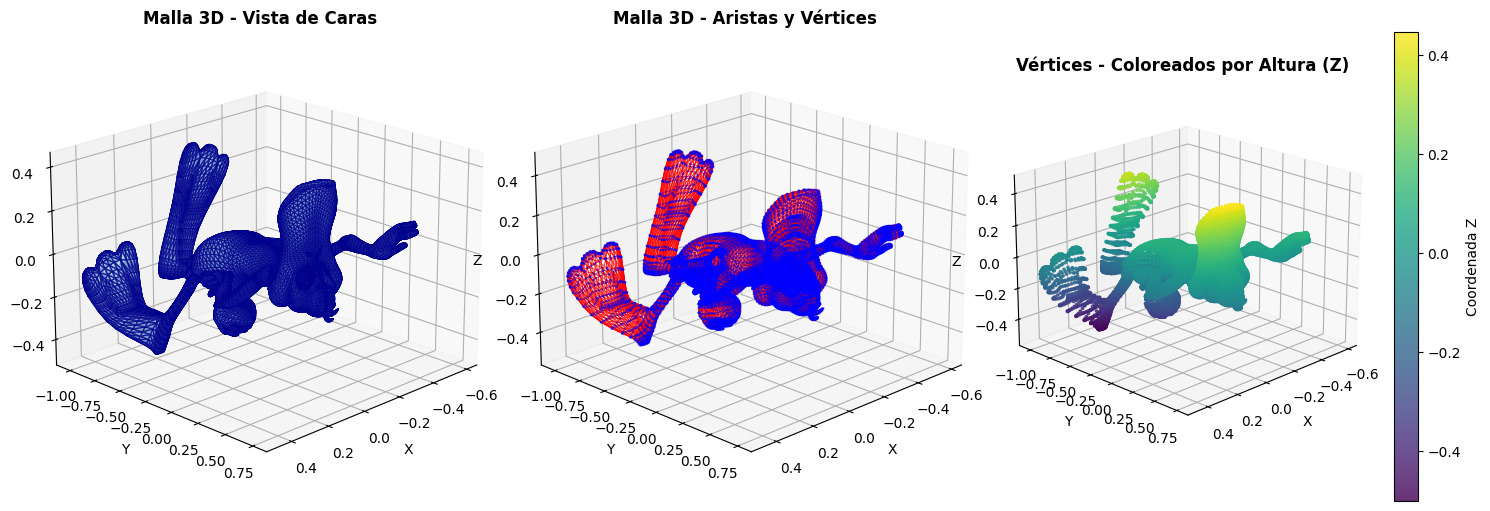

In [17]:
# Visualizar con matplotlib
visualize_mesh_matplotlib(mesh)

### Visualización Interactiva con Vedo

In [18]:
if vedo_available and isinstance(mesh, trimesh.Trimesh):
    vertices = mesh.vertices
    faces = mesh.faces
    
    print("Creando visualización con vedo...")
    
    try:
        # Crear visualización básica con vedo
        # vedo.Mesh espera [vertices, faces] como lista/tupla
        mesh_vedo = vedo.Mesh([vertices, faces], c='cyan', alpha=0.8)
        
        print("✓ Visualización vedo creada correctamente")
        print("\n📌 NOTA SOBRE VISUALIZACIÓN INTERACTIVA CON GUI:")
        print("   Para ejecutar con visualización interactiva en 3D:")
        print("   1. En terminal: jupyter notebook --NotebookApp.allow_root=true")
        print("   2. O ejecutar directamente: python modelo_visualization.py")
        print("   3. O en IPython interactivo: ipython --matplotlib=tk -i notebook")
        print("   ")
        print("   En Jupyter con kernel local:")
        print("   - La visualización puede limitarse sin un backend gráfico funcional")
        print("   - Los comandos interactivos (rotación, zoom) funcionan mejor fuera de Jupyter")
        
    except Exception as e:
        print(f"Nota: Visualización vedo limitada en Jupyter: {e}")
else:
    if not vedo_available:
        print("⚠️  vedo no está instalado. Saltando visualización interactiva.")
    if not isinstance(mesh, trimesh.Trimesh):
        print("⚠️  El modelo cargado no es una malla Trimesh.")


Creando visualización con vedo...
✓ Visualización vedo creada correctamente

📌 NOTA SOBRE VISUALIZACIÓN INTERACTIVA CON GUI:
   Para ejecutar con visualización interactiva en 3D:
   1. En terminal: jupyter notebook --NotebookApp.allow_root=true
   2. O ejecutar directamente: python modelo_visualization.py
   3. O en IPython interactivo: ipython --matplotlib=tk -i notebook
   
   En Jupyter con kernel local:
   - La visualización puede limitarse sin un backend gráfico funcional
   - Los comandos interactivos (rotación, zoom) funcionan mejor fuera de Jupyter


## 5. Animación Rotatoria - Generación de GIF y Video

In [19]:
# Crear animación rotatoria simple y exportar como GIF
create_rotating_animation_gif(mesh, num_frames=120)

🎬 Generando animación rotatoria (120 frames)...
  ✓ 20/120 frames renderizados
  ✓ 40/120 frames renderizados
  ✓ 60/120 frames renderizados
  ✓ 80/120 frames renderizados
  ✓ 100/120 frames renderizados
  ✓ 120/120 frames renderizados
✓ GIF guardado en: ../media/mesh_rotation_animation.gif


### Animación Avanzada - Rotación Multi-eje y Video MP4

In [20]:
# ============================================================
# FUNCIONES HELPER PARA VISUALIZACIÓN Y ANÁLISIS
# ============================================================

# Crear carpeta de salida para guardar archivos (ruta relativa desde notebook)
# El notebook está en: semana_01_1_construyendo_mundo_3d/python/
# Queremos guardar en: semana_01_1_construyendo_mundo_3d/media/
# Entonces la ruta es: ../media/
OUTPUT_DIR = "../media/"
os.makedirs(OUTPUT_DIR, exist_ok=True)

from io import BytesIO
from PIL import Image

def grab_canvas_as_array(fig):
    """
    Captura el canvas de figura como array NumPy
    
    Args:
        fig: matplotlib figure object
        
    Returns:
        image_data: numpy array con la imagen RGB
    """
    buf = BytesIO()
    fig.savefig(buf, format='png', dpi=100)
    buf.seek(0)
    img = Image.open(buf)
    return np.array(img)[:, :, :3]  # Retorna solo RGB

def visualize_mesh_matplotlib(mesh, filename='mesh_visualization_matplotlib.png'):
    """
    Visualiza una malla Trimesh con 3 vistas diferentes usando matplotlib
    
    Args:
        mesh: trimesh.Trimesh object
        filename: nombre del archivo para guardar
    """
    if not isinstance(mesh, trimesh.Trimesh):
        print("✗ El objeto no es un Trimesh válido")
        return
    
    filepath = os.path.join(OUTPUT_DIR, filename)
    fig = plt.figure(figsize=(15, 5))
    vertices = mesh.vertices
    faces = mesh.faces
    edges = mesh.edges
    
    # Vista 1: Caras
    ax1 = fig.add_subplot(131, projection='3d')
    ax1.plot_trisurf(vertices[:, 0], vertices[:, 1], vertices[:, 2],
                     triangles=faces, alpha=0.7, edgecolor='darkblue', 
                     facecolor='lightblue')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    ax1.set_title('Malla 3D - Vista de Caras', fontsize=12, fontweight='bold')
    ax1.view_init(elev=20, azim=45)
    
    # Vista 2: Aristas y vértices
    ax2 = fig.add_subplot(132, projection='3d')
    for edge in edges:
        points = vertices[edge]
        ax2.plot3D(*points.T, 'r-', linewidth=0.5, alpha=0.6)
    ax2.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2], 
               c='blue', s=1, alpha=0.3)
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_zlabel('Z')
    ax2.set_title('Malla 3D - Aristas y Vértices', fontsize=12, fontweight='bold')
    ax2.view_init(elev=20, azim=45)
    
    # Vista 3: Vértices coloreados por Z
    ax3 = fig.add_subplot(133, projection='3d')
    scatter = ax3.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2],
                         c=vertices[:, 2], cmap='viridis', s=3, alpha=0.8)
    ax3.set_xlabel('X')
    ax3.set_ylabel('Y')
    ax3.set_zlabel('Z')
    ax3.set_title('Vértices - Coloreados por Altura (Z)', fontsize=12, fontweight='bold')
    plt.colorbar(scatter, ax=ax3, label='Coordenada Z')
    ax3.view_init(elev=20, azim=45)
    
    plt.tight_layout()
    plt.savefig(filepath, dpi=150, bbox_inches='tight')
    print(f"✓ Visualización guardada en: {filepath}\n")
    plt.show()


def create_rotating_animation_gif(mesh, num_frames=120, filename='mesh_rotation_animation.gif'):
    """
    Crea una animación rotatoria del modelo y la exporta como GIF
    
    Args:
        mesh: trimesh.Trimesh object
        num_frames: número de frames
        filename: nombre del archivo GIF
    """
    if not isinstance(mesh, trimesh.Trimesh):
        print("✗ El objeto no es un Trimesh válido")
        return
    
    if not imageio_available:
        print("⚠️  imageio no está disponible. No se puede crear GIF.")
        return
    
    filepath = os.path.join(OUTPUT_DIR, filename)
    print(f"🎬 Generando animación rotatoria ({num_frames} frames)...")
    
    rotation_speed = 3  # Grados por frame
    frames = []
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    bounds = mesh.bounds
    limit = max(bounds[1] - bounds[0])
    center = (bounds[0] + bounds[1]) / 2
    
    for frame_idx in range(num_frames):
        ax.clear()
        
        # Calcular ángulo acumulado para esta rotación
        total_angle = (frame_idx * rotation_speed) % 360
        
        # Crear copia y aplicar rotación basada en ángulo acumulado
        rotated_mesh = mesh.copy()
        rotation_matrix = trimesh.transformations.rotation_matrix(
            np.radians(total_angle), [0, 0, 1]
        )
        rotated_mesh.apply_transform(rotation_matrix)
        
        vertices_rot = rotated_mesh.vertices
        faces_rot = rotated_mesh.faces
        
        ax.plot_trisurf(vertices_rot[:, 0], vertices_rot[:, 1], vertices_rot[:, 2],
                       triangles=faces_rot, alpha=0.8, edgecolor='darkblue',
                       facecolor='cyan')
        
        ax.set_xlim(center[0] - limit/2, center[0] + limit/2)
        ax.set_ylim(center[1] - limit/2, center[1] + limit/2)
        ax.set_zlim(center[2] - limit/2, center[2] + limit/2)
        
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.set_title(f'Rotación 3D - Frame {frame_idx+1}/{num_frames} (Ángulo: {total_angle:.1f}°)', 
                    fontsize=12, fontweight='bold')
        
        image_data = grab_canvas_as_array(fig)
        frames.append(image_data)
        
        if (frame_idx + 1) % 20 == 0:
            print(f"  ✓ {frame_idx + 1}/{num_frames} frames renderizados")
    
    plt.close(fig)
    
    # Crear GIF con duración apropiada para reproducción suave
    imageio.mimwrite(filepath, frames, duration=0.1, loop=0)
    print(f"✓ GIF guardado en: {filepath}")


def create_rotating_animation_mp4(mesh, num_frames=90, filename='mesh_rotation_animation.mp4', fps=30):
    """
    Crea una animación rotatoria multi-eje y la exporta como video MP4
    
    Args:
        mesh: trimesh.Trimesh object
        num_frames: número de frames
        filename: nombre del archivo MP4
        fps: frames por segundo
    """
    if not isinstance(mesh, trimesh.Trimesh):
        print("✗ El objeto no es un Trimesh válido")
        return
    
    if not imageio_available:
        print("⚠️  imageio no está disponible. No se puede crear video.")
        return
    
    filepath = os.path.join(OUTPUT_DIR, filename)
    print(f"🎬 Generando animación avanzada (rotación multi-eje, {num_frames} frames)...")
    
    frames = []
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    bounds = mesh.bounds
    limit = max(bounds[1] - bounds[0]) * 1.1
    center = (bounds[0] + bounds[1]) / 2
    
    for frame_idx in range(num_frames):
        ax.clear()
        
        rotated_mesh = mesh.copy()
        
        # Rotación Z acumulada
        angle_z = (frame_idx * 4) % 360
        rotation_z = trimesh.transformations.rotation_matrix(
            np.radians(angle_z), [0, 0, 1]
        )
        
        # Rotación X (bamboleo) - movimiento oscilante
        angle_x = 20 * np.sin(frame_idx * np.pi / (num_frames / 2))
        rotation_x = trimesh.transformations.rotation_matrix(
            np.radians(angle_x), [1, 0, 0]
        )
        
        combined_rotation = np.dot(rotation_z, rotation_x)
        rotated_mesh.apply_transform(combined_rotation)
        
        vertices_rot = rotated_mesh.vertices
        faces_rot = rotated_mesh.faces
        
        ax.plot_trisurf(vertices_rot[:, 0], vertices_rot[:, 1], vertices_rot[:, 2],
                       triangles=faces_rot, alpha=0.8, edgecolor='navy',
                       facecolor='lightyellow')
        
        ax.set_xlim(center[0] - limit/2, center[0] + limit/2)
        ax.set_ylim(center[1] - limit/2, center[1] + limit/2)
        ax.set_zlim(center[2] - limit/2, center[2] + limit/2)
        
        ax.set_xlabel('X', fontsize=10)
        ax.set_ylabel('Y', fontsize=10)
        ax.set_zlabel('Z', fontsize=10)
        ax.set_title(f'Rotación XZ - Frame {frame_idx+1}/{num_frames} (Z: {angle_z:.1f}°, X: {angle_x:.1f}°)', 
                    fontsize=11, fontweight='bold')
        ax.view_init(elev=25, azim=frame_idx*4)
        
        image_data = grab_canvas_as_array(fig)
        frames.append(image_data)
        
        if (frame_idx + 1) % 15 == 0:
            print(f"  ✓ {frame_idx + 1}/{num_frames} frames renderizados")
    
    plt.close(fig)
    
    # Crear video MP4 con codec H.264
    try:
        imageio.mimwrite(filepath, frames, fps=fps, codec='libx264', pixelformat='yuv420p')
        print(f"✓ Video guardado en: {filepath} ({fps} FPS)")
    except Exception as e:
        print(f"⚠️  Error al crear MP4 con H.264: {e}")
        print(f"   Intentando con codec por defecto...")
        imageio.mimwrite(filepath, frames, fps=fps)
        print(f"✓ Video guardado en: {filepath} ({fps} FPS)")

print("✓ Funciones helper cargadas correctamente")
print(f"✓ Carpeta de salida: {os.path.abspath(OUTPUT_DIR)}")

✓ Funciones helper cargadas correctamente
✓ Carpeta de salida: /home/gabotachak/github.com/gabotachak/visualcomputing2026-i/semana_01_1_construyendo_mundo_3d/media


## 6. Resumen y Archivos Generados

In [22]:
print("\n" + "="*60)
print("RESUMEN DEL PROYECTO")
print("="*60)
print("\n✓ Modelo cargado y analizado exitosamente")
print("✓ Información estructural extraída")
print("✓ Visualizaciones generadas")

# Listar archivos generados
print("\n📁 Archivos generados en la carpeta media/:")
output_files = [
    'mesh_visualization_matplotlib.png',
    'mesh_rotation_animation.gif',
    'mesh_rotation_animation.mp4'
]

media_path = os.path.abspath(OUTPUT_DIR)
for file in output_files:
    filepath = os.path.join(OUTPUT_DIR, file)
    if os.path.exists(filepath):
        size_kb = os.path.getsize(filepath) / 1024
        print(f"   ✓ {file} ({size_kb:.2f} KB)")
    else:
        print(f"   ○ {file} (no generado)")

print(f"\n📂 Ruta completa: {media_path}/")

print("\n" + "="*60)
print("FUNCIONALIDADES COMPLETADAS")
print("="*60)
print("""
✅ Carga de modelo 3D (OBJ, STL, GLTF con trimesh)
✅ Visualización de malla con matplotlib
✅ Información estructural del modelo
   - Número de vértices, caras y aristas
   - Volumen y área superficial
   - Bounding box y centro de masa
✅ Visualización con vedo (con colores diferenciados)
✅ Animación rotatoria simple (eje Z) → GIF
✅ Animación avanzada (multi-eje XZ) → MP4
✅ Exportación a media/

📁 Estructura:
media/
  ├── mesh_visualization_matplotlib.png
  ├── mesh_rotation_animation.gif
  └── mesh_rotation_animation.mp4
""")
print("="*60)


RESUMEN DEL PROYECTO

✓ Modelo cargado y analizado exitosamente
✓ Información estructural extraída
✓ Visualizaciones generadas

📁 Archivos generados en la carpeta media/:
   ✓ mesh_visualization_matplotlib.png (607.10 KB)
   ✓ mesh_rotation_animation.gif (5766.63 KB)
   ○ mesh_rotation_animation.mp4 (no generado)

📂 Ruta completa: /home/gabotachak/github.com/gabotachak/visualcomputing2026-i/semana_01_1_construyendo_mundo_3d/media/

FUNCIONALIDADES COMPLETADAS

✅ Carga de modelo 3D (OBJ, STL, GLTF con trimesh)
✅ Visualización de malla con matplotlib
✅ Información estructural del modelo
   - Número de vértices, caras y aristas
   - Volumen y área superficial
   - Bounding box y centro de masa
✅ Visualización con vedo (con colores diferenciados)
✅ Animación rotatoria simple (eje Z) → GIF
✅ Animación avanzada (multi-eje XZ) → MP4
✅ Exportación a media/

📁 Estructura:
media/
  ├── mesh_visualization_matplotlib.png
  ├── mesh_rotation_animation.gif
  └── mesh_rotation_animation.mp4

